In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
df=pd.read_csv('/content/gdrive/My Drive/credit.csv')

In [4]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [73]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [6]:
df.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:
df['savings_balance'] = df['savings_balance'].map({"< 100 DM":1 ,"101 - 500 DM":2,"501 - 1000 DM":3, "> 1000 DM":4 });
df['savings_balance'] = df['savings_balance'].fillna(df['savings_balance'].dropna().mean())

In [8]:
df['checking_balance'] = df['checking_balance'].map({"< 0 DM":1 , "1 - 200 DM":2 , "> 200 DM":3});
df['checking_balance'] = df['checking_balance'].fillna(df['checking_balance'].dropna().mean())

In [9]:
df['credit_history'] = df['credit_history'].map({"critical":1 , "repaid":2 , "delayed":3, "fully repaid":4, "fully repaid this bank":5});
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].dropna().mean())

In [10]:
df['purpose'] = df['purpose'].map({"radio/tv":1 , "education":2 , "furniture":3, "car (new)":4, "car (used)":5,"business":6 , "domestic appliances":7 , "repairs":8, "others":9, "retraining":10});
df['purpose'] = df['purpose'].fillna(df['purpose'].dropna().mean())

In [11]:
df['personal_status'] = df['personal_status'].map({"single male":1 , "female":2 , "divorced male":3, "married male":4});
df['personal_status'] = df['personal_status'].fillna(df['personal_status'].dropna().mean())

In [12]:
df['job'] = df['job'].map({"skilled employee":1 , "unskilled resident":2 , "mangement self-employed":3, "unemployed non-resident":4});
df['job'] = df['job'].fillna(df['job'].dropna().mean())

In [13]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1.000000,6,1,1,1169,1.456548,> 7 yrs,4,1,none,4,real estate,67,none,own,2,1,1,yes,yes,1
1,2.000000,48,2,1,5951,1.000000,1 - 4 yrs,2,2,none,2,real estate,22,none,own,1,2,1,none,yes,1
2,1.651815,12,1,2,2096,1.000000,4 - 7 yrs,2,1,none,3,real estate,49,none,own,1,1,2,none,yes,2
3,1.000000,42,2,3,7882,1.000000,4 - 7 yrs,2,1,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,1
4,1.000000,24,3,4,4870,1.000000,1 - 4 yrs,3,1,none,4,unknown/none,53,none,for free,2,2,2,none,yes,1
5,1.651815,36,2,2,9055,1.456548,1 - 4 yrs,2,1,none,4,unknown/none,35,none,for free,1,1,2,yes,yes,2
6,1.651815,24,2,3,2835,3.000000,> 7 yrs,3,1,none,4,building society savings,53,none,own,1,1,1,none,yes,1
7,2.000000,36,2,5,6948,1.000000,1 - 4 yrs,2,1,none,2,other,35,none,rent,1,1,1,yes,yes,3
8,1.651815,12,2,1,3059,4.000000,4 - 7 yrs,2,3,none,4,real estate,61,none,own,1,1,1,none,yes,2
9,2.000000,30,1,4,5234,1.000000,unemployed,4,4,none,2,other,28,none,own,2,2,1,none,yes,3


In [14]:
print("Purpose : ",df.purpose.unique())
print("Sex : ",df.personal_status.unique())
print("Housing : ",df.housing.unique())
print("Saving accounts : ",df['savings_balance'].unique())
print("Credit Status : ", df['credit_history'].unique())
print("Job : ", df['job'].unique())
print("checking Balance : ", df['checking_balance'].unique())
print("employment_length : ", df['employment_length'].unique())
print("personal_status : ", df['personal_status'].unique())

Purpose :  [ 1  2  3  4  5  6  7  8  9 10]
Sex :  [1 2 3 4]
Housing :  ['own' 'for free' 'rent']
Saving accounts :  [1.45654835 1.         3.         4.         2.        ]
Credit Status :  [1 2 3 4 5]
Job :  [1 2 3 4]
checking Balance :  [1.         2.         1.65181518 3.        ]
employment_length :  ['> 7 yrs' '1 - 4 yrs' '4 - 7 yrs' 'unemployed' '0 - 1 yrs']
personal_status :  [1 2 3 4]


In [15]:
df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

<Figure size 432x288 with 0 Axes>

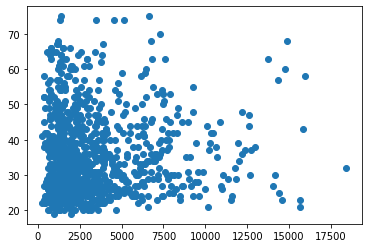

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(df['amount'],df["age"])
plt.figure()

<Figure size 432x288 with 0 Axes>

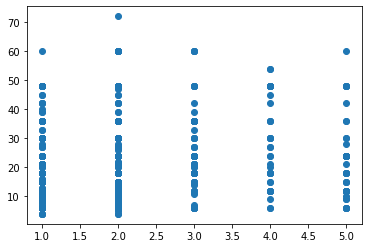

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(df['credit_history'],df["months_loan_duration"])
plt.figure()

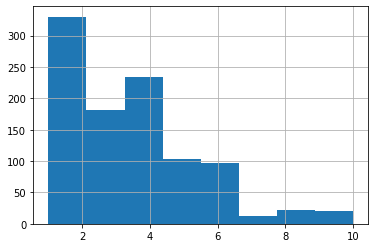

In [18]:
fig = df["purpose"].hist(bins=8)

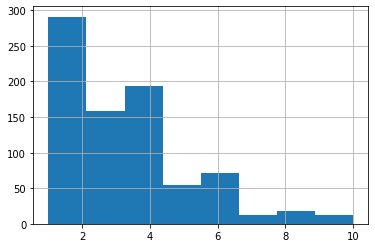

In [19]:
limitedCredit = df[(df["amount"]<=5000)==True];
imitedCredit = df[(df["amount"]>2000)==True];
fig = limitedCredit["purpose"].hist(bins=8)

Text(0, 40, 'Frequency')

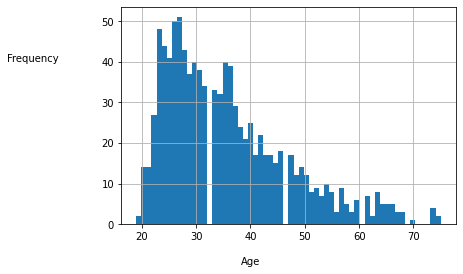

In [20]:
fig = df.age.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

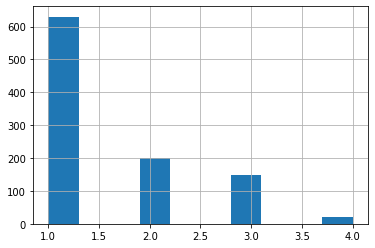

In [21]:
fig = df["job"].hist()

In [22]:
# group by function
grouped = df.groupby(['checking_balance','credit_history', 'purpose'])  
# view the median Age by the grouped features 
grouped.age.median()

checking_balance  credit_history  purpose
1.0               1               1          52.0
                                  2          26.0
                                  3          27.0
                                  4          39.0
                                  5          50.0
                                             ... 
3.0               3               6          66.0
                  4               1          34.0
                                  6          33.0
                  5               1          45.5
                                  6          26.0
Name: age, Length: 131, dtype: float64

Values describe: 
credit_history   1    2   3   4   5
purpose                            
1               80  167  20   4   9
2               19   23   5   0   3
3               50  106  10   7   8
4               78  120  17   7  12
5               36   51   8   3   5
6               19   33  23  15   7
7                1   10   0   0   1
8                6   11   3   2   0
9                3    4   2   1   2
10               1    5   0   1   2


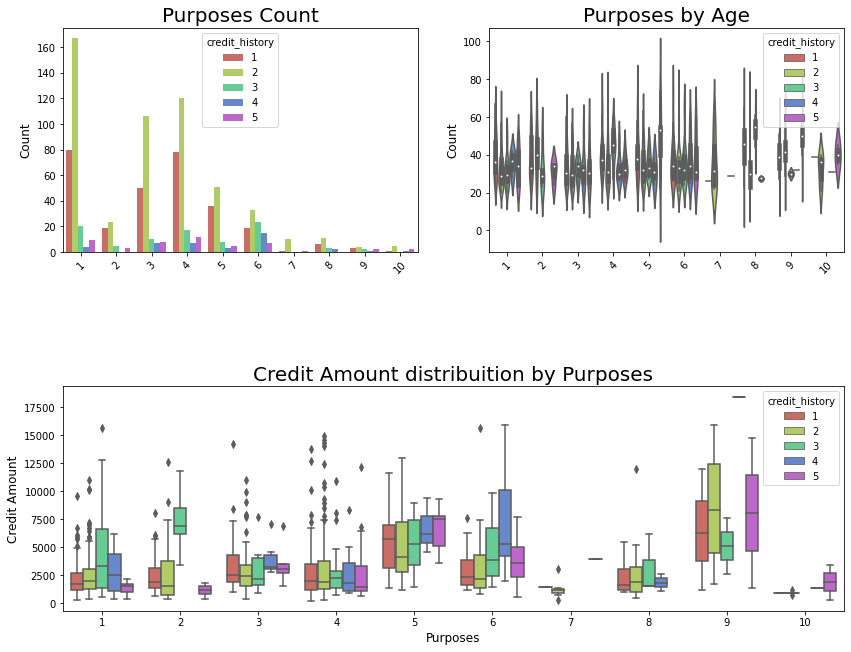

In [23]:
print("Values describe: ")
print(pd.crosstab(df.purpose, df.credit_history))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="purpose", data=df, 
              palette="hls", hue = "credit_history")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="purpose", y="age", data=df, 
                    palette="hls", hue = "credit_history")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="purpose", y="amount", data=df, 
               palette="hls", hue = "credit_history")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

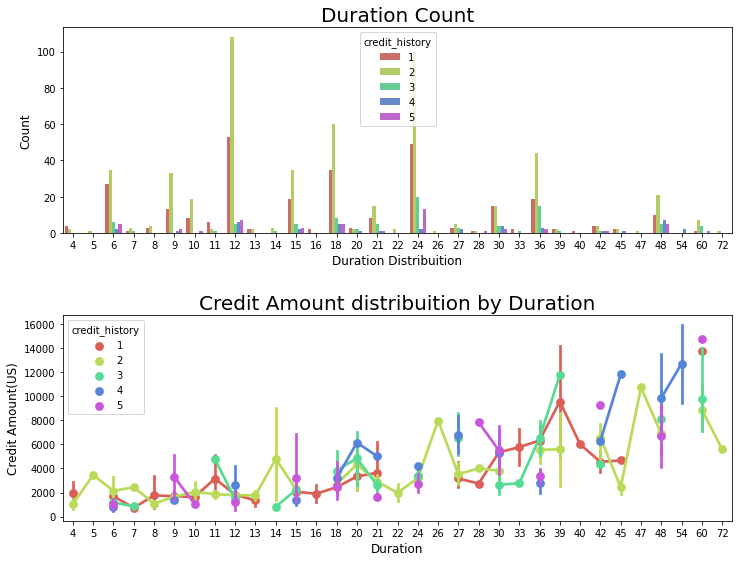

In [24]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="months_loan_duration", data=df, 
              palette="hls",  hue = "credit_history")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="months_loan_duration", y ="amount",data=df,
                   hue="credit_history", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

#g2 = plt.subplot(313)
#g2 = sns.distplot(df_good["Duration"], color='g')
#g2 = sns.distplot(df_bad["Duration"], color='r')
#g2.set_xlabel("Duration", fontsize=12)
#g2.set_ylabel("Frequency", fontsize=12)
#g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

In [25]:
date_int = ["purpose", 'personal_status']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[date_int[0]], df[date_int[1]]).style.background_gradient(cmap = cm)

personal_status,1,2,3,4
purpose,,,,
1,146,85,7,42
2,27,21,1,1
3,85,74,15,7
4,134,70,10,20
5,70,24,3,6
6,59,19,10,9
7,4,6,1,1
8,12,5,2,3
9,8,3,1,0


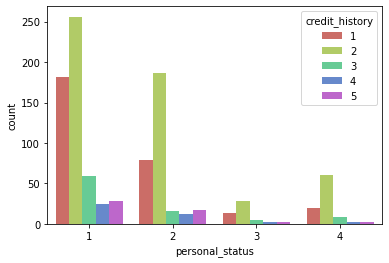

In [26]:
sns.countplot(x="personal_status", data=df, 
              palette="hls", hue = "credit_history")

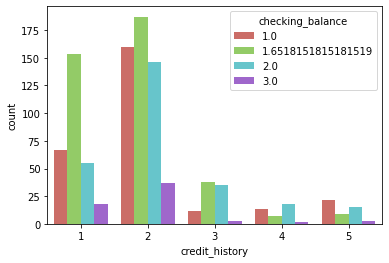

In [27]:
sns.countplot(x="credit_history", data=df, 
              palette="hls", hue = "checking_balance")

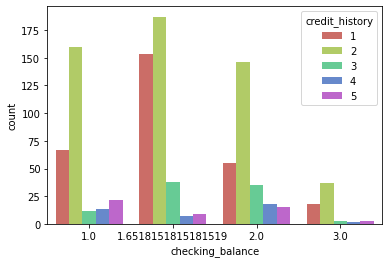

In [28]:
sns.countplot(x="checking_balance", data=df, 
              palette="hls", hue = "credit_history")

In [29]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,1.000000,6,1,1,1169,1.456548,> 7 yrs,4,1,none,4,real estate,67,none,own,2,1,1,yes,yes,1
1,2.000000,48,2,1,5951,1.000000,1 - 4 yrs,2,2,none,2,real estate,22,none,own,1,2,1,none,yes,1
2,1.651815,12,1,2,2096,1.000000,4 - 7 yrs,2,1,none,3,real estate,49,none,own,1,1,2,none,yes,2
3,1.000000,42,2,3,7882,1.000000,4 - 7 yrs,2,1,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,1
4,1.000000,24,3,4,4870,1.000000,1 - 4 yrs,3,1,none,4,unknown/none,53,none,for free,2,2,2,none,yes,1


In [30]:
df.drop(['employment_length', 'other_debtors', 'residence_history', 'property', 'installment_plan', 'housing', 'dependents', 'telephone', 'foreign_worker'], axis=1, inplace=True)

In [31]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,installment_rate,personal_status,age,existing_credits,default,job
0,1.000000,6,1,1,1169,1.456548,4,1,67,2,1,1
1,2.000000,48,2,1,5951,1.000000,2,2,22,1,2,1
2,1.651815,12,1,2,2096,1.000000,2,1,49,1,1,2
3,1.000000,42,2,3,7882,1.000000,2,1,45,1,1,1
4,1.000000,24,3,4,4870,1.000000,3,1,53,2,2,1


In [32]:
X=df.drop('default',axis=1)
y=df.default

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,train_size=0.8)

In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 11), (200, 11), (800,), (200,))

In [35]:
pipe=Pipeline([('scaler',StandardScaler()),('classifier',RandomForestClassifier())])

In [36]:
grid_params=[
              {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [50,75,100],
                 "classifier__max_depth":[2,4,6,None],
                 "classifier__min_samples_leaf":[1,2,5],
                 "classifier__max_leaf_nodes": [2, 4,6]},
             {
              "classifier":[DecisionTreeClassifier()],
              "classifier__max_depth":[2,5,7,None],
              "classifier__min_samples_leaf":[1,2,3,5]}
             ,
             {
              "classifier":[GradientBoostingClassifier()],
              "classifier__learning_rate":[0.1,0.5,0.01,],
              "classifier__n_estimators":[50,100,75,150]
             }
             ,
             {
              "classifier":[AdaBoostClassifier()],
              "classifier__n_estimators":[50,75,100],
              "classifier__learning_rate":[0.1,0.01,0.5]
             }
             ,
             {
             "classifier":[XGBClassifier()],
              "classifier__max_depth":[1,3,4]
             }
             
]

In [37]:
clf=GridSearchCV(pipe,grid_params,cv=5,n_jobs=-1)
best_model=clf.fit(X_train,y_train)

In [38]:
print(best_model.best_estimator_)
print("")
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

The mean accuracy of the model is: 0.745


In [39]:
y_pred=best_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.87      0.79      0.83       156
           2       0.44      0.59      0.50        44

    accuracy                           0.74       200
   macro avg       0.66      0.69      0.67       200
weighted avg       0.78      0.74      0.76       200



<Figure size 1080x720 with 0 Axes>

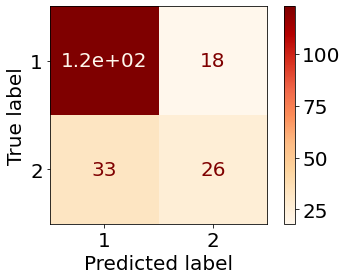

In [40]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(best_model,X_test,y_test,cmap="OrRd")
plt.show()

**Neural Networks**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X_train)


In [50]:
X_train.shape

(800, 11)

In [80]:
model=Sequential()
model.add(Dense(units=8,activation='selu',kernel_initializer='lecun_normal'))
#model.add(BatchNormalization())
model.add(Dense(units=11,activation='selu',kernel_initializer='lecun_normal'))
#model.add(BatchNormalization())
model.add(Dense(units=5,activation='selu',kernel_initializer='lecun_normal'))
#model.add(BatchNormalization())
model.add(Dense(units=5,activation='tanh',kernel_initializer='glorot_normal'))
#model.add(Dense(units=4,activation='selu',kernel_initializer='lecun_normal'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [82]:
trained=model.fit(scaled,y_train,validation_split=0.2,epochs=15)

Epoch 1/15
20/20 [==============================] - 0s 6ms/step - loss: -1.4557 - accuracy: 0.7047 - val_loss: -1.6163 - val_accuracy: 0.6750
Epoch 2/15
20/20 [==============================] - 0s 4ms/step - loss: -1.4950 - accuracy: 0.7047 - val_loss: -1.6624 - val_accuracy: 0.6750
Epoch 3/15
20/20 [==============================] - 0s 5ms/step - loss: -1.5351 - accuracy: 0.7047 - val_loss: -1.7055 - val_accuracy: 0.6750
Epoch 4/15
20/20 [==============================] - 0s 4ms/step - loss: -1.5736 - accuracy: 0.7047 - val_loss: -1.7479 - val_accuracy: 0.6750
Epoch 5/15
20/20 [==============================] - 0s 3ms/step - loss: -1.6112 - accuracy: 0.7047 - val_loss: -1.7903 - val_accuracy: 0.6750
Epoch 6/15
20/20 [==============================] - 0s 4ms/step - loss: -1.6491 - accuracy: 0.7047 - val_loss: -1.8311 - val_accuracy: 0.6750
Epoch 7/15
20/20 [==============================] - 0s 4ms/step - loss: -1.6856 - accuracy: 0.7047 - val_loss: -1.8726 - val_accuracy: 0.6750
Epoch 

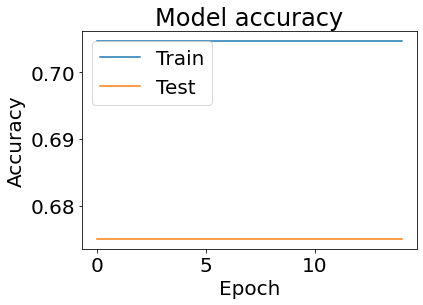

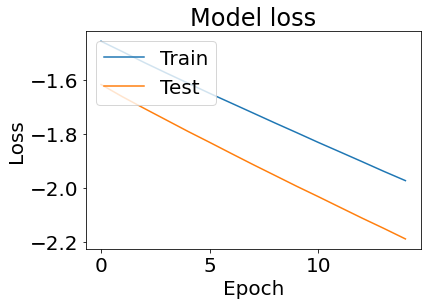

In [83]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import pickle 
pickle_out=open("best_model.pkl","wb")
pickle.dump(best_model,pickle_out)
pickle_out.close()
